In [1]:
import pandas as pd
import numpy as np
import imp

import pprint
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import spearmanr,kruskal,mannwhitneyu

%matplotlib inline
sns.set_style('whitegrid')

In [2]:
imp.load_source('biom_library','/Users/firasmidani/Downloads/microbiome_routines/biom_library.py');
from biom_library import *

## List of functions

* `otuTaxaDict()`
* `subsetTableByMetadata()`
* `subsetTableyBySampleIDs()`
* `summarizeTable()`
* `tss_norm()`
* `phyloSummaryOtuTableSingle()`
* `read_pcoa_file()`
* `pcoa_figure()`


## Import BIOM file
Break down the BIOM file into two items:
1. otu_table:  OTUs by samples
2. otu_taxa_map: mapping of OTU ID to taxonomy

In [3]:
biom = pd.read_csv('./tables/otus_table.filtered.from_biom.txt',sep='\t',header=0,index_col=0,skiprows=1)
otu_taxa_map = pd.DataFrame(biom.iloc[:,-1])
otu_table = biom.iloc[:,:-1]

In [4]:
print otu_taxa_map.shape
otu_taxa_map.head()

(2226, 1)


,taxonomy
#OTU ID,
1027904,k__Bacteria; p__Firmicutes; c__Bacilli; o__Bac...
1050608,k__Bacteria; p__Actinobacteria; c__Actinobacte...
127870,k__Bacteria; p__Proteobacteria; c__Alphaproteo...
816470,k__Bacteria; p__Firmicutes; c__Bacilli; o__Bac...
177792,k__Bacteria; p__Firmicutes; c__Clostridia; o__...


In [5]:
print otu_table.shape
otu_table.head()

(2226, 138)


,113,30,15,145,116,72,37,49,64,73,...,130,87,88,115,4,31,117,123,133,99
#OTU ID,,,,,,,,,,,,,,,,,,,,,
1027904,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1050608,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127870,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
816470,0.0,0.0,0.0,9.0,4.0,3.0,2.0,3.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177792,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Most of the functions in this library are designed to accept an OTU sample with samples as rows and OTUs as columns. So, let's transpose the OTU table. 

In [6]:
otu_table = otu_table.T

## Delineate taxonomic levels for each OTU 

In [7]:
otu_taxa_dict = otuTaxaDict(otu_taxa_map)
otu_taxa_dict.head()

,p,c,o,f,g,s
#OTU ID,,,,,,
1027904,Firmicutes,Bacilli,Bacillales,Staphylococcaceae,Macrococcus,
1050608,Actinobacteria,Actinobacteria,Actinomycetales,Corynebacteriaceae,Corynebacterium,
127870,Proteobacteria,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae,Novosphingobium,
816470,Firmicutes,Bacilli,Bacillales,Bacillaceae,,
177792,Firmicutes,Clostridia,Clostridiales,,,


## Subsettting an OTU table by sample IDs

In [8]:
subsetTableBySampleIDs(otu_table,[90,93,145])

'ERROR : Some samples are missing from the table.'

In [9]:
subsetTableBySampleIDs(otu_table,['90','93','145'])

#OTU ID,816470,360717,3571769,192773,1111582,309696,524318,196893,290468,4369988,...,518743,196664,531675,198555,583117,315846,237444,560336,580008,351231
90,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,53.0
93,0.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0
145,9.0,0.0,1.0,1.0,7.0,7.0,1.0,5.0,1.0,0.0,...,3.0,1.0,1.0,0.0,48.0,1.0,0.0,1.0,33.0,69.0


## Subsettting an OTU table by metada

First, we need to import metadata 

In [10]:
mapping_df = pd.read_csv('./2017_03_15_mapping_processed.txt',sep='\t',header=0,index_col=0)
print mapping_df.shape
mapping_df.head()

(138, 6)


,BarcodeSequence,Plate,Row,Column,Time/Comment,NumReads
#SampleID,,,,,,
113,ACAATGTCACAG,2.0,E,7.0,0,1199.0
30,GAAAGGTGAGAA,4.0,B,8.0,0,4394.0
15,TCAATGACCGCA,2.0,C,7.0,0,1333.0
145,GAATCCTCACCG,4.0,C,7.0,0,1697.0
116,GTCCCTATTATC,1.0,H,3.0,0,2957.0


In [39]:
parameters_dict = {'Plate':[1,2,3],'Row':['C'],'Time/Comment':['24']}
new_table = subsetTableByMetadata(otu_table, mapping_df,parameters_dict)

pprint.pprint(parameters_dict,width=50)
new_table

{'Plate': [1, 2, 3],
 'Row': ['C'],
 'Time/Comment': ['24']}


#OTU ID,310380,360717,221784,4242681,309696,290468,4369988,182116,4366525,365628,...,696563,523542,193769,346639,301270,196660,198555,237444,580008,339512
46,3.0,1.0,2.0,1.0,0.0,128.0,0.0,2.0,1.0,0.0,...,0.0,2996.0,6.0,20.0,0.0,2.0,1.0,0.0,0.0,1.0
125,0.0,0.0,0.0,0.0,109.0,3.0,13.0,0.0,0.0,0.0,...,0.0,230.0,0.0,3.0,0.0,0.0,0.0,18.0,0.0,0.0
129,0.0,0.0,0.0,0.0,78.0,0.0,9.0,0.0,0.0,1.0,...,2.0,33.0,0.0,2.0,0.0,0.0,0.0,12.0,0.0,0.0
102,0.0,0.0,0.0,0.0,103.0,0.0,11.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,14.0,0.0,0.0
39,0.0,0.0,0.0,0.0,66.0,0.0,9.0,0.0,0.0,0.0,...,0.0,7.0,0.0,0.0,0.0,0.0,0.0,10.0,1.0,0.0


In [40]:
summarizeTable(new_table,otu_taxa_dict).head()

,mean,median,count,min,max,p,c,o,f,g,s
#OTU ID,,,,,,,,,,,
310380,0.6,3.0,1.0,3.0,3.0,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Dorea,
360717,0.2,1.0,1.0,1.0,1.0,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Blautia,
221784,0.4,2.0,1.0,2.0,2.0,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Blautia,
4242681,0.2,1.0,1.0,1.0,1.0,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Dorea,
309696,71.2,90.5,4.0,66.0,109.0,Firmicutes,Clostridia,Clostridiales,Clostridiaceae,,


In [41]:
summarizeTable(new_table,otu_taxa_dict).sort_values(['mean'],ascending=False).head()

,mean,median,count,min,max,p,c,o,f,g,s
#OTU ID,,,,,,,,,,,
349024,3645.8,4748.0,5.0,1.0,5398.0,Firmicutes,Bacilli,Lactobacillales,Streptococcaceae,Streptococcus,
523542,653.2,131.5,4.0,7.0,2996.0,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Dorea,
309696,71.2,90.5,4.0,66.0,109.0,Firmicutes,Clostridia,Clostridiales,Clostridiaceae,,
523782,54.8,3.5,4.0,2.0,265.0,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,,
363321,43.8,18.0,3.0,5.0,196.0,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Dorea,


In [42]:
new_table.head().sum(1)

46     4516.0
125    5899.0
129    4983.0
102    5032.0
39     3408.0
dtype: float64

## Convert absolute abundances to relativea abudnances with total sum scaling

In [43]:
norm_otu_table = tss_norm(otu_table)
print norm_otu_table.sum().head()
norm_otu_table.head()

113    1.0
30     1.0
15     1.0
145    1.0
116    1.0
dtype: float64


,113,30,15,145,116,72,37,49,64,73,...,130,87,88,115,4,31,117,123,133,99
#OTU ID,,,,,,,,,,,,,,,,,,,,,
1027904,0.000834,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1050608,0.000000,0.000228,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127870,0.000000,0.000000,0.00075,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
816470,0.000000,0.000000,0.00000,0.005303,0.001353,0.000779,0.000621,0.000508,0.000671,0.000978,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177792,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
norm_otu_table_0 = tss_norm(otu_table,axis=0)
print norm_otu_table_0.sum().head()
norm_otu_table_0.head()

#OTU ID
1027904    1.0
1050608    1.0
127870     1.0
816470     1.0
177792     1.0
dtype: float64


#OTU ID,1027904,1050608,127870,816470,177792,337735,193591,182674,310380,366068,...,194925,194924,351231,197214,525698,577377,4417325,503354,259955,361398
113,1.0,0.0,0.0,0.000000,0.0,0.0,0.043478,0.0,0.0,0.0,...,0.0,0.0,0.096815,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
30,0.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.003822,0.0,0.0,0.033333,0.0,0.0,0.0,0.0
15,0.0,0.0,1.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.014013,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
145,0.0,0.0,0.0,0.333333,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.087898,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
116,0.0,0.0,0.0,0.148148,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.021656,0.0,0.0,0.005556,0.0,0.0,0.0,0.0


Let us generate another one and join these two tables.

## Standard statistical and taxonomic summary of a table

In [82]:
imp.load_source('biom_library','/Users/firasmidani/Downloads/microbiome_routines/biom_library.py');
from biom_library import *

In [83]:
phyloSummaryOtuTableSingle(tss_norm(new_table),otu_taxa_dict,['p','c'])

OrderedDict([('p',                Num. OTUs Rel. Abundance
              Firmicutes           118       0.986714
              Bacteroidetes          9      0.0104074
              Actinobacteria         3     0.00287865),
             ('c',                 Num. OTUs Rel. Abundance
              Clostridia             95       0.986492
              Bacteroidia             9      0.0104074
              Actinobacteria          2     0.00243578
              Coriobacteriia          1     0.00044287
              Bacilli                22    0.000221435
              Erysipelotrichi         1              0)])

In [87]:
new_table_summary = phyloSummaryOtuTableSingle(tss_norm(new_table),otu_taxa_dict)
new_table_summary['g']

,Num. OTUs,Rel. Abundance
Dorea,29,0.795837
,42,0.170283
[Ruminococcus],6,0.0110717
Bacteroides,8,0.0104074
Blautia,11,0.00531444
Coprococcus,4,0.00376439
Bifidobacterium,2,0.00243578
Collinsella,1,0.00044287
Streptococcus,21,0.000221435
Roseburia,2,0.000221435


## Principal coordinate analysis figure using QIIME-formatted principal components

In [98]:
pcoa_dict = read_pcoa_file('./pc/pcoa_weighted_unifrac_otus_table.filtered.txt')
print pcoa_dict.keys()

['eigen_vectors', 'eigen_values', 'var_explained']


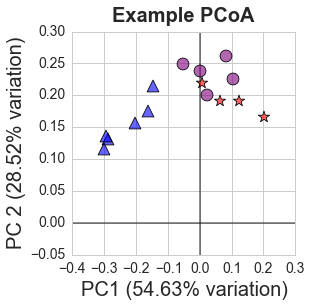

In [105]:
fig,ax = plt.subplots(figsize=[4,4])

classes = {'24_1':[{'Time/Comment':['24'],'Column':[1]},(0.0,0.0,1.0,0.60),'^','24_1'],
           '24_2':[{'Time/Comment':['24'],'Column':[2]},(0.5,0.0,0.5,0.60),'o','24_2'],
           '24_3':[{'Time/Comment':['24'],'Column':[3]},(1.0,0.0,0.0,0.60),'*','24_3']}

pcoa_figure(pcoa_dict,ax,['0','1'],'Example PCoA',mapping_df,classes)

In [112]:
pcoa_dict = {};
for distance_metric in ['weighted_unifrac','unweighted_unifrac','bray_curtis','binary_jaccard']: 
    pcoa_dict[distance_metric] = read_pcoa_file('./pc/pcoa_%s_otus_table.filtered.txt' % distance_metric)

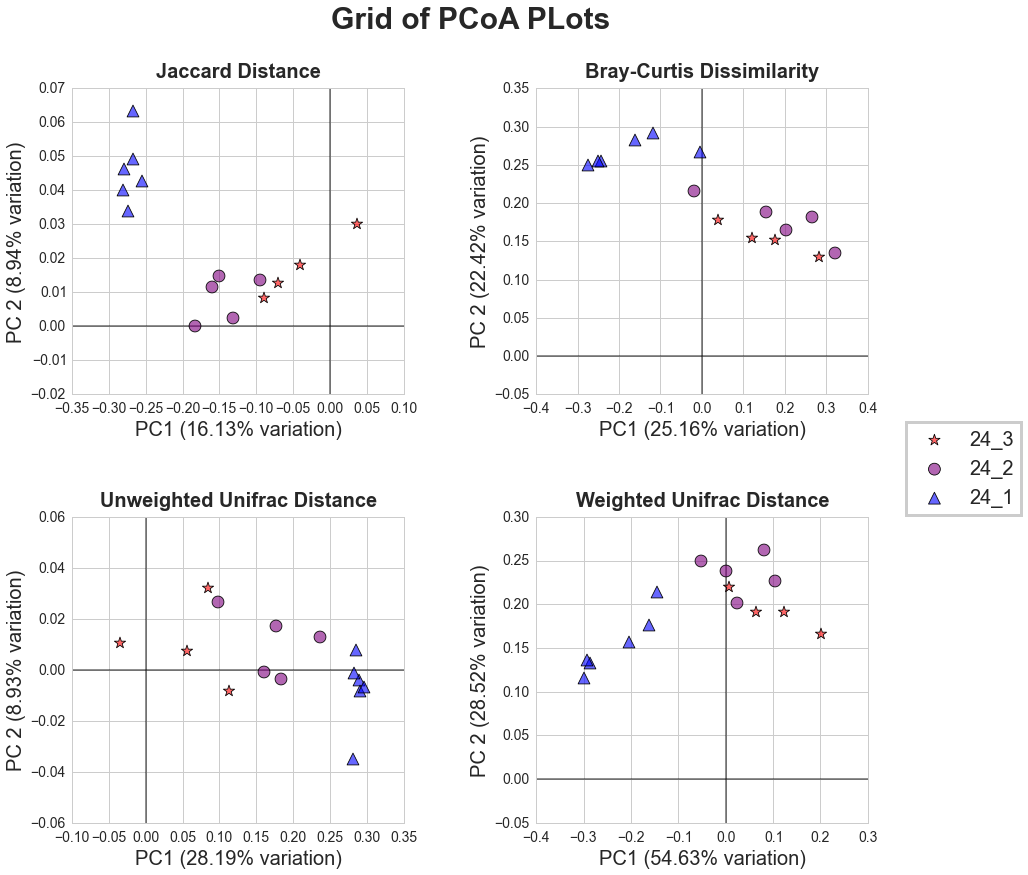

In [116]:
#plt.rc('font',family='sans-serif',serif='Arial')

import matplotlib.gridspec as gridspec

fig   = plt.figure(figsize=(13,12))
gs    = gridspec.GridSpec(2,2,height_ratios=[1,1],hspace=0.4,wspace=0.4)

ax_={};
ax_[0] =  plt.subplot(gs[0,0])
ax_[1] =  plt.subplot(gs[0,1])
ax_[2] =  plt.subplot(gs[1,0])
ax_[3] =  plt.subplot(gs[1,1])

classes = {'24_1':[{'Time/Comment':['24'],'Column':[1]},(0.0,0.0,1.0,0.60),'^','24_1'],
           '24_2':[{'Time/Comment':['24'],'Column':[2]},(0.5,0.0,0.5,0.60),'o','24_2'],
           '24_3':[{'Time/Comment':['24'],'Column':[3]},(1.0,0.0,0.0,0.60),'*','24_3']}


pcoa_figure(pcoa_dict['weighted_unifrac'],    ax_[3], ['0','1'], 'Weighted Unifrac Distance', mapping_df, classes);
pcoa_figure(pcoa_dict['unweighted_unifrac'],  ax_[2], ['0','1'], 'Unweighted Unifrac Distance', mapping_df, classes);
pcoa_figure(pcoa_dict['bray_curtis'],         ax_[1], ['0','1'], 'Bray-Curtis Dissimilarity', mapping_df, classes);
pcoa_figure(pcoa_dict['binary_jaccard'],      ax_[0], ['0','1'], 'Jaccard Distance', mapping_df, classes);

legend = ax_[3].legend(bbox_to_anchor=(1.1,0.55),bbox_transform=plt.gcf().transFigure,fontsize=20,frameon=True)
legend.get_frame().set_linewidth(3)

plt.suptitle('Grid of PCoA PLots',fontsize=30,fontweight='bold',y=1.02)

plt.gcf().subplots_adjust(left=0.075,right=0.925,top=0.925,bottom=0.075)

# plt.savefig('./figs/20170411_beta_diversity_panel.pdf',format='pdf')